## 1. Acquire Data

🎯 Acquire the initial (training) data from the web, using TabularDatasetFactory. Transform it into a Pandas dataframe.



In [15]:
from azureml.data.dataset_factory import TabularDatasetFactory
from train import clean_data, split_variables

train_csv_path = "https://automlsamplenotebookdata.blob.core.windows.net/automl-sample-notebook-data/bankmarketing_train.csv"

dataset = TabularDatasetFactory.from_delimited_files(train_csv_path)

df = dataset.to_pandas_dataframe().dropna()
df.head(5)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,57,technician,married,high.school,no,no,yes,cellular,may,mon,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
1,55,unknown,married,unknown,unknown,yes,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
2,33,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,...,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no
3,36,admin.,married,high.school,no,no,no,telephone,jun,fri,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
4,27,housemaid,married,high.school,no,yes,no,cellular,jul,fri,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no



## 2. Breakdown the Data

🎯 Check the datatypes and values for each field.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 0 to 32949
Data columns (total 21 columns):
age               32950 non-null int64
job               32950 non-null object
marital           32950 non-null object
education         32950 non-null object
default           32950 non-null object
housing           32950 non-null object
loan              32950 non-null object
contact           32950 non-null object
month             32950 non-null object
day_of_week       32950 non-null object
duration          32950 non-null int64
campaign          32950 non-null int64
pdays             32950 non-null int64
previous          32950 non-null int64
poutcome          32950 non-null object
emp.var.rate      32950 non-null float64
cons.price.idx    32950 non-null float64
cons.conf.idx     32950 non-null float64
euribor3m         32950 non-null float64
nr.employed       32950 non-null float64
y                 32950 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [17]:
for column in df:
    print(f'Column: {column} - Unique values: {df[column].unique()}')

Column: age - Unique values: [57 55 33 36 27 58 48 51 24 34 42 43 56 26 53 37 46 59 49 30 45 31 41 38
 47 69 50 25 39 44 63 52 60 35 77 32 28 40 29 54 81 70 21 22 74 80 62 61
 68 86 23 71 67 65 20 19 66 75 18 72 82 85 88 83 78 64 17 76 73 79 94 89
 84 91 98 92 95]
Column: job - Unique values: ['technician' 'unknown' 'blue-collar' 'admin.' 'housemaid' 'retired'
 'services' 'entrepreneur' 'unemployed' 'management' 'self-employed'
 'student']
Column: marital - Unique values: ['married' 'divorced' 'single' 'unknown']
Column: education - Unique values: ['high.school' 'unknown' 'basic.9y' 'professional.course'
 'university.degree' 'basic.4y' 'basic.6y' 'illiterate']
Column: default - Unique values: ['no' 'unknown' 'yes']
Column: housing - Unique values: ['no' 'yes' 'unknown']
Column: loan - Unique values: ['yes' 'no' 'unknown']
Column: contact - Unique values: ['cellular' 'telephone']
Column: month - Unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'apr' 'mar' 'sep' 'dec']
Column: day_of_

## 3. Describe the Data

🎯 The dataset contains the following fields:
* 🔞 **Age** - Age of the person (number)
* 👨‍🏭 **Job** - Employment type/category of the person (technician/blue-collar/retired/etc.) 
* 👩‍🤝‍👩🏻 **Marital** status (married/divorced/single/unknown)
* 🎓 **Education** status (high.school/university/etc.)
* 🤷‍♀️ **Default** - If the person has credit in default (yes/no/unknown)
* 🏠 **Housing** - If the person has housing loan (yes/no/unknown)
* 🔃 **Loan** - If the personal has personal loan (yes/no/unknown)
* 📞 **Contact** (cellular/telephone)
* 📅 **Month** - Last contact month of the year (jan/feb/mar/etc.)
* 📆 **Day** - Last contact day of the week (mon/tue/wed/etc.)
* ⌚ **Duration** - Call duration (numeirc)
* 📫 **Campaign**, pdays, previous, poutcome - Related to the results of a previous campaign of similar purpose on the current user.
* 📈 **emp.var.rate, cons.price.idx, euribor3m** - Various economic indices

* 🧲 **y** - Target variable, whether the client has subscribed to a term deposit (yes/no)

Find statistical measures of the data below:



In [18]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.040212,257.335205,2.561730,962.174780,0.174780,0.076228,93.574243,-40.518680,3.615654,5166.859608
std,10.432313,257.331700,2.763646,187.646785,0.496503,1.572242,0.578636,4.623004,1.735748,72.208448
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000



## 4. Transform the Data

🎯 Preprocess the data. From the *description* above, there are no visible outliers.
 * Drop the duration column. We want to predict the success before making the call, and this variable is known only afterwards.
 * Drop the rows where we have 'unknown' values.

In [19]:
df.drop(columns=['duration'], inplace=True)
unknown_variables = ['marital', 'default', 'housing', 'loan']

for variable in unknown_variables:
    df.drop(df[df[variable]=='unknown'].index, inplace=True)

In [20]:
binary_variables = ['default', 'housing', 'loan', 'y']
dictionary = {'no': 0, 'yes': 1}

for variable in binary_variables:
    df[variable] = df[variable].apply(lambda x: dictionary[x])


## 5. Visualize Data
### 5.1 Categorical Data Distributions

🎯 Visualize the distribution of the categorical variables and see if any insights can be drawn

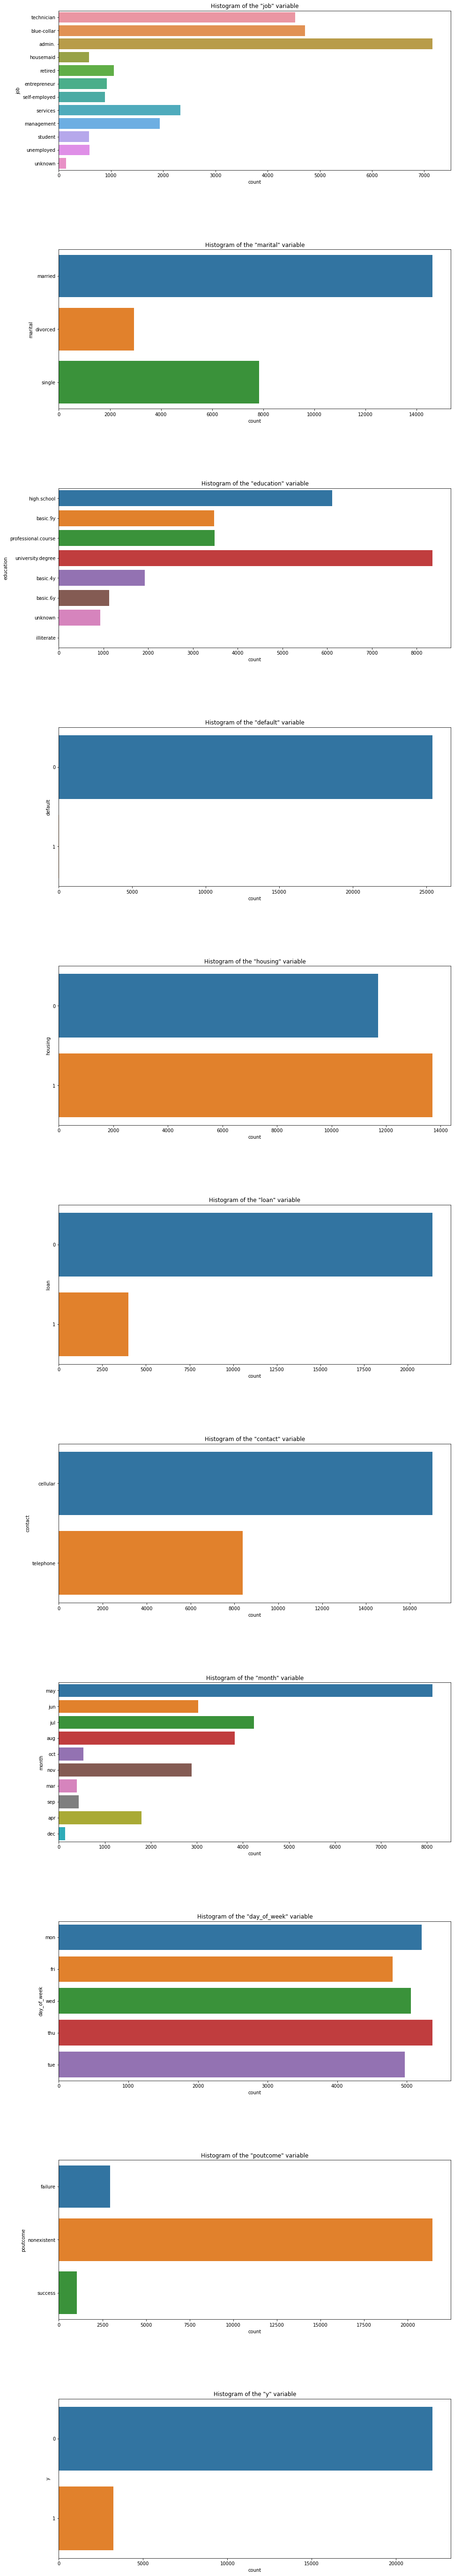

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
fig, ax = plt.subplots(nrows=11, ncols=1, figsize=(15, 100))
fig.subplots_adjust(hspace=.5)
for index, data in enumerate(categorical_variables):
    sns.countplot(y=data, data=df, ax = ax[index])
    ax[index].set_title(f'Histogram of the "{data}" variable')


## Takeaways

🎯 Interpretation of the histograms above

* Months of May and December had abnormally high, respectively low amount of data. December is low as there are probably less campaigns in the month of holidays and excessive spendings.
* Most of the clients were not part of previous campaigns.
* The distribution of the target variable is not uniform, so the problem at face is an **imbalanced binary classification**


### 5.1 Numeric Data Distributions

🎯 Visualize the distribution of the numerical variables and see if any insights can be drawn.

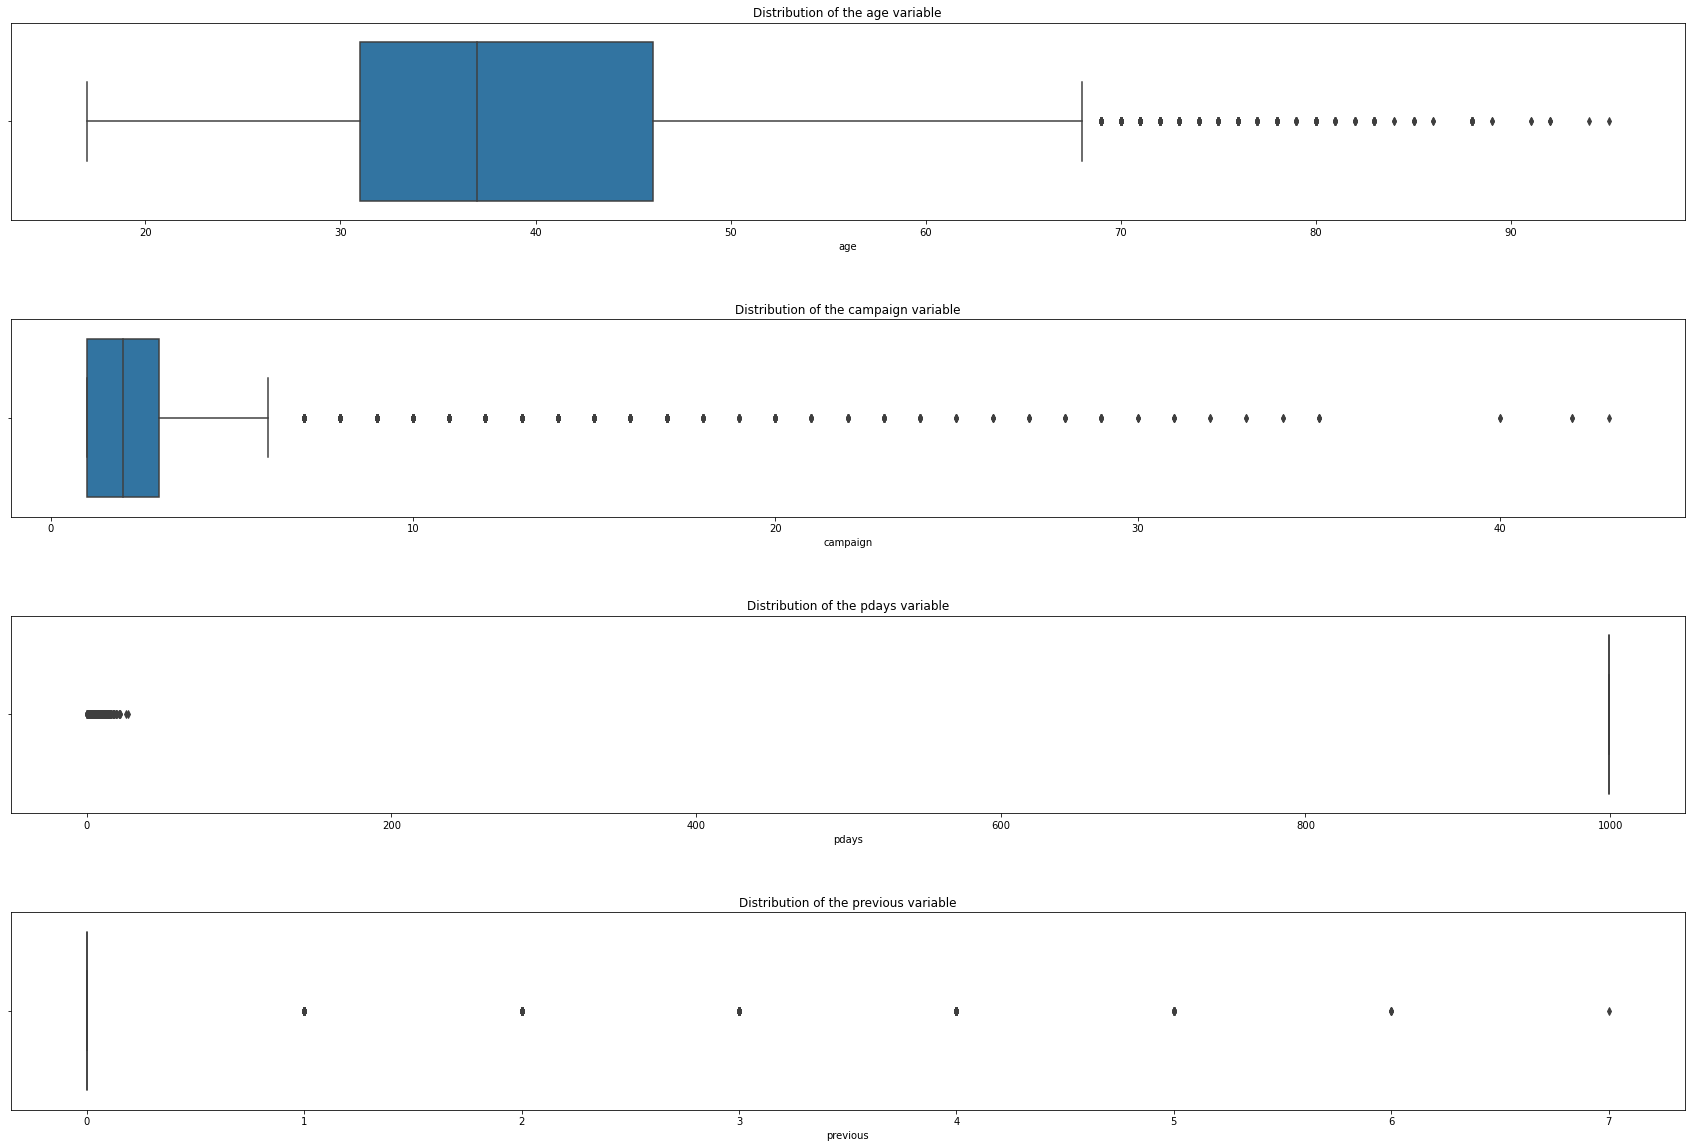

In [36]:
numeric_variables = ['age', 'campaign', 'pdays', 'previous']

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(30, 20))
fig.subplots_adjust(hspace=.5)

for index, variable in enumerate(numeric_variables):
    sns.boxplot(x=df[variable], ax=ax[index])
    ax[index].set_title(f'Distribution of the {variable} variable')

## Takeaways

* The median age is ~37 years, with the interquartile range of around (32, 47). There are some outliers over 75th percentile + 3/2 IQR - people above the age of 67.
* For the pdays, 999 means the client was never contacted. Perhaps his can be changed to 0.

In [40]:
df.loc[(df['pdays'] == 999), 'pdays'] = 0 

## 6. Feature Engineering

🎯 Create new features from the existing ones based on analyses

### 6.1 Age Groupping

By inspecting the relationship between the success rate and the age, we can see that the age group between 30 and 55 has the lowest conversion rate.


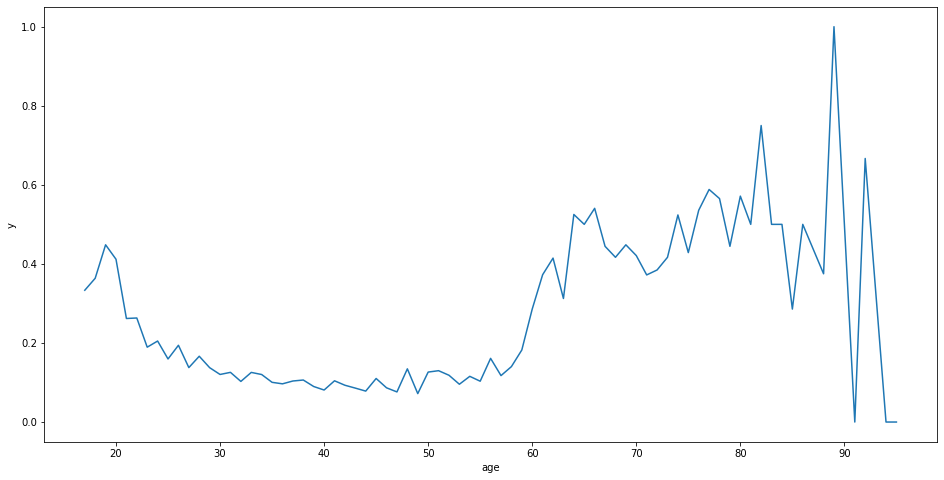

In [44]:
conversion_rate_by_age = df.groupby('age')['y'].mean().to_frame().reset_index()
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='age', y='y', data=conversion_rate_by_age)

## Create Age groups
 * < 30 years
 * 30 - 55 years (this is a category with lower conversion rate, possibly because they are low on money to invest)
 * \> 55 years

In [45]:
df.loc[:, 'age_group'] = '<30'
df.loc[(df['age'] >= 30) & (df['age'] <= 55), 'age_group'] = '30-55'
df.loc[(df['age'] > 55), 'age_group'] = '>55'

### 6.2 Previous Campaign Groupping

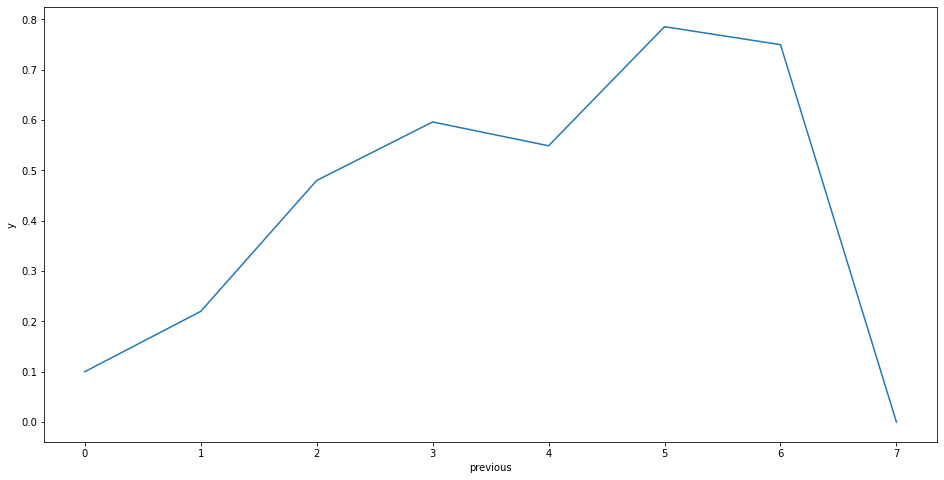

In [47]:
conversion_rate_by_campaign = df.groupby('previous')['y'].mean().to_frame().reset_index()
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='previous', y='y', data=conversion_rate_by_campaign)

* Campaigns 0 and 1 had a low conversion rate
* Campaigns 2 3 and 4 had an average conversion rate
* Campaigns 5 and 6 had a high conversion rate
* Campaign 7 had a very low conversion rate?

In [59]:
df.loc[:, 'previous_group'] = '0-1'
df.loc[(df['previous'] == 2), 'previous_group'] = '2-3-4'
df.loc[(df['previous'] == 3), 'previous_group'] = '2-3-4'
df.loc[(df['previous'] == 4), 'previous_group'] = '2-3-4'
df.loc[(df['previous'] == 5), 'previous_group'] = '5-6'
df.loc[(df['previous'] == 6), 'previous_group'] = '5-6'
df.loc[(df['previous'] == 7), 'previous_group'] = '7'

In [62]:
df.drop('previous', axis=1)
df.drop('age', axis=1)

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,previous_group
0,technician,married,high.school,0,0,1,cellular,may,mon,1,...,1,failure,-1.8,92.893,-46.2,1.299,5099.1,0,>55,0-1
2,blue-collar,married,basic.9y,0,0,0,cellular,may,fri,1,...,1,failure,-1.8,92.893,-46.2,1.313,5099.1,0,30-55,0-1
3,admin.,married,high.school,0,0,0,telephone,jun,fri,4,...,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0,30-55,0-1
4,housemaid,married,high.school,0,1,0,cellular,jul,fri,2,...,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0,<30,0-1
5,retired,married,professional.course,0,1,1,cellular,jul,fri,1,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0,>55,0-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,housemaid,married,basic.4y,0,0,1,cellular,jul,mon,1,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0,>55,0-1
32946,management,married,university.degree,0,0,1,cellular,jul,fri,7,...,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,0,30-55,0-1
32947,admin.,single,university.degree,0,0,0,cellular,may,tue,4,...,1,failure,-1.8,92.893,-46.2,1.266,5099.1,0,<30,0-1
32948,blue-collar,single,basic.9y,0,0,0,cellular,apr,mon,1,...,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,30-55,0-1


In [63]:
import pandas as pd

categorical_variables = ['age_group', 'previous_group', 'job', 'marital', 'education', 'contact', 'month', 'poutcome', 'day_of_week']

df = pd.get_dummies(df, columns=categorical_variables, drop_first=False)


In [64]:
df.head(5)

,age,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,57,0,0,1,1,0,1,-1.8,92.893,-46.2,...,0,0,1,0,0,0,1,0,0,0
2,33,0,0,0,1,0,1,-1.8,92.893,-46.2,...,0,0,1,0,0,1,0,0,0,0
3,36,0,0,0,4,0,0,1.4,94.465,-41.8,...,0,0,0,1,0,1,0,0,0,0
4,27,0,1,0,2,0,0,1.4,93.918,-42.7,...,0,0,0,1,0,1,0,0,0,0
5,58,0,1,1,1,0,0,1.4,93.918,-42.7,...,0,0,0,1,0,1,0,0,0,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25402 entries, 0 to 32949
Data columns (total 63 columns):
age                              25402 non-null int64
default                          25402 non-null int64
housing                          25402 non-null int64
loan                             25402 non-null int64
campaign                         25402 non-null int64
pdays                            25402 non-null int64
previous                         25402 non-null int64
emp.var.rate                     25402 non-null float64
cons.price.idx                   25402 non-null float64
cons.conf.idx                    25402 non-null float64
euribor3m                        25402 non-null float64
nr.employed                      25402 non-null float64
y                                25402 non-null int64
age_group_30-55                  25402 non-null uint8
age_group_<30                    25402 non-null uint8
age_group_>55                    25402 non-null uint8
previous_group_0-